# Lab: Trees and Model Stability

Trees are notorious for being **unstable**: Small changes in the data can lead to noticeable or large changes in the tree. We're going to explore this phenomenon, and a common rebuttal.

In the folder for this lab, there are three datasets that we used in class: Divorce, heart failure, and the AirBnB price dataset.

1. Pick one of the datasets and appropriately clean it.
2. Perform a train-test split for a specific seed (save the seed for reproducibility). Fit a classification/regression tree and a linear model on the training data and evaluate their performance on the test data. Set aside the predictions these models make.
3. Repeat step 2 for three to five different seeds (save the seeds for reproducibility). How different are the trees that you get? Your linear model coefficients?. Set aside the predictions these models make.

Typically, you would see the trees changing what appears to be a non-trivial amount, while the linear model coefficients don't vary nearly as much. Often, the changes appear substantial.

But are they?

4. Instead of focusing on the tree or model coefficients, do three things:
    1. Make scatterplots of the predicted values on the test set from question 2 against the predicted values for the alternative models from part 3, separately for your trees and linear models. Do they appear reasonably similar?
    2. Compute the correlation between your model in part 2 and your alternative models in part 3, separately for your trees and linear models. Are they highly correlated or not?
    3. Run a simple linear regression of the predicted values on the test set from the alternative models on the predicted values from question 2, separately for your trees and linear models. Is the intercept close to zero? Is the slope close to 1? Is the $R^2$ close to 1?

5. Do linear models appear to have similar coefficients and predictions across train/test splits? Do trees?
6. True or false, and explain: "Even if the models end up having a substantially different appearance, the predictions they generate are often very similar."

**1. Pick one of the datasets and appropriately clean it.**

In [ ]:
#Import and Clean the Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/Harryshield14/lab_tree_stability/main/data/heart_failure/heart_failure_clinical_records_dataset.csv"

df_heart = pd.read_csv(url)
df_heart_c = df_heart.copy()

df_heart_c['age'] = df_heart_c['age'].round().astype(int)
df_heart_c['platelets'] = df_heart_c['platelets'].round().astype(int)
df_heart_c['serum_creatinine'] = df_heart_c['serum_creatinine'].round(1).astype(int)

df_heart_c.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000,1,130,1,0,4,1
1,55,0,7861,0,38,0,263358,1,136,1,0,6,1
2,65,0,146,0,20,0,162000,1,129,1,1,7,1
3,50,1,111,0,20,0,210000,1,137,1,0,7,1
4,65,1,160,1,20,0,327000,2,116,0,0,8,1


**2. Perform a train-test split for a specific seed (save the seed for reproducibility). Fit a classification/regression tree and a linear model on the training data and evaluate their performance on the test data. Set aside the predictions these models make. Train Test Split Seed 42**

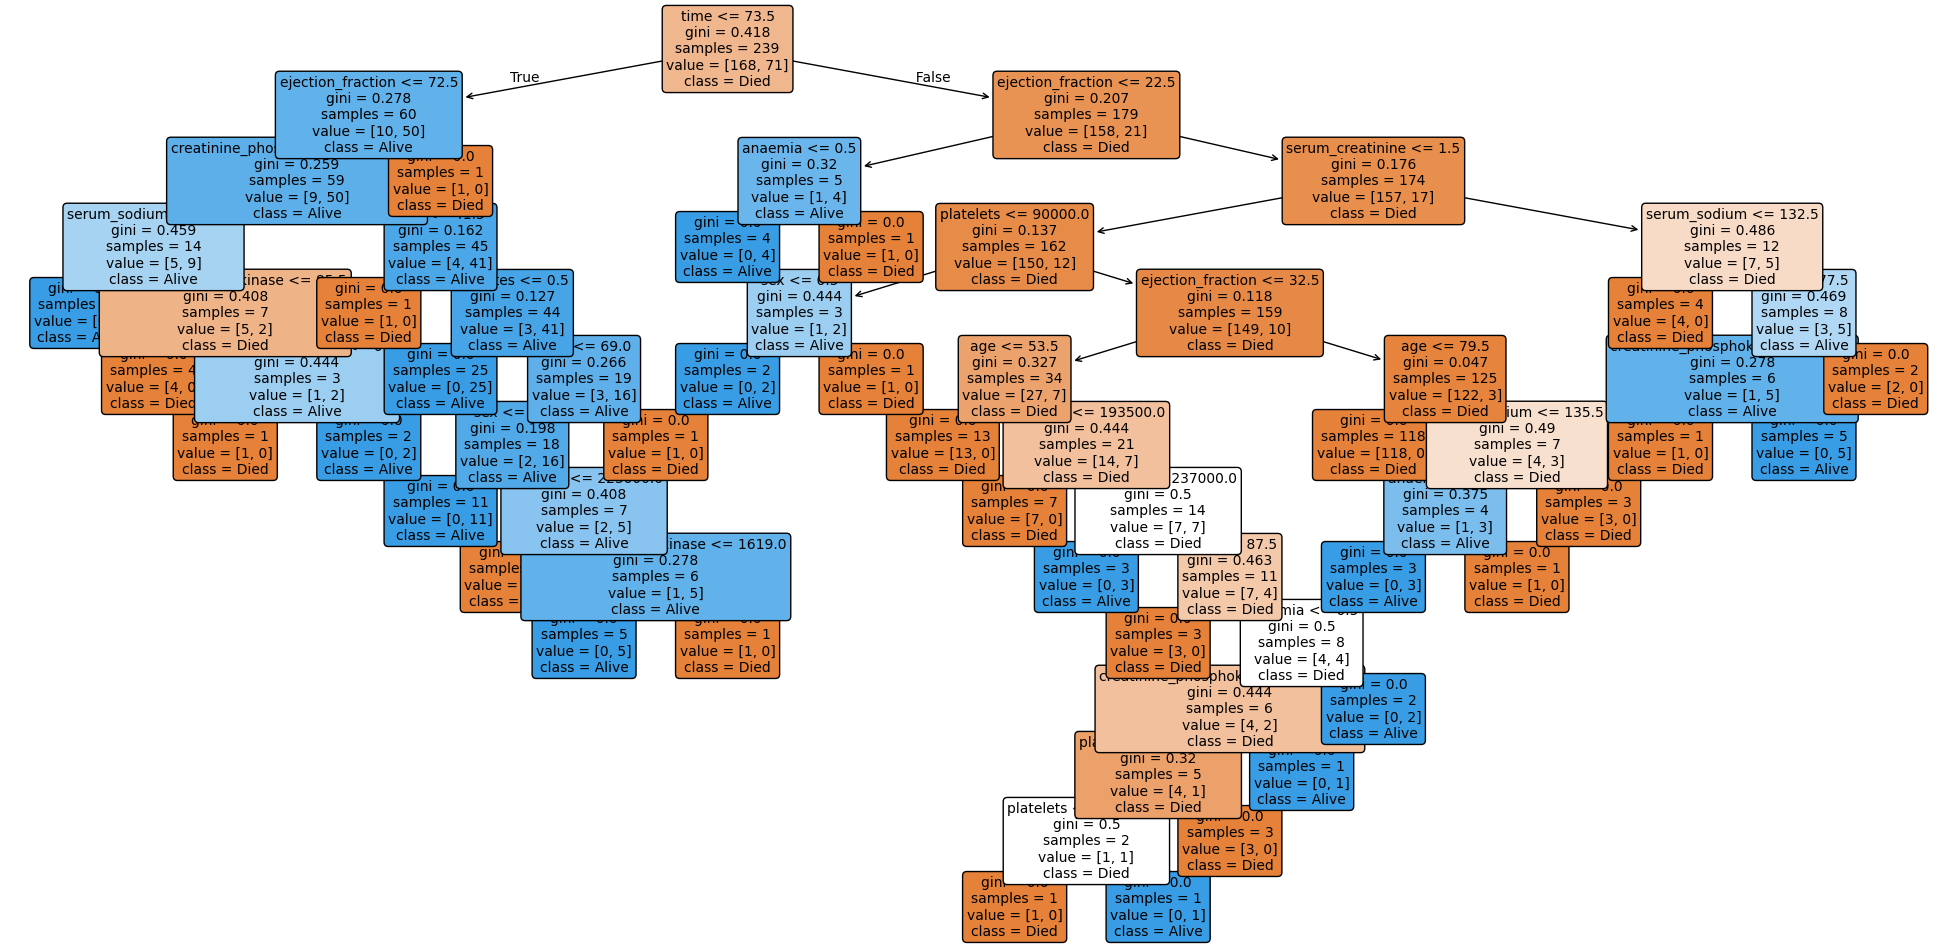

Decision Tree Accuracy: 0.6833333333333333
Logistic Regression Accuracy: 0.7166666666666667


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

X = df_heart_c.drop(columns = 'DEATH_EVENT')
y = df_heart_c['DEATH_EVENT']

SEED1 = 42

X_train_42, X_test_42, y_train_42, y_test_42 = train_test_split(X, y, test_size = 0.2, random_state = SEED1)


tree = DecisionTreeClassifier(random_state = SEED1)
tree.fit(X_train_42, y_train_42)

y_pred_tree_42 = tree.predict(X_test_42)
tree_acc_42 = accuracy_score(y_test_42, y_pred_tree_42)

plt.figure(figsize=(25, 12))
plot_tree(
    tree,
    feature_names=X.columns,
    class_names=["Died", "Alive"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

print("Decision Tree Accuracy:", tree_acc_42)


log_reg = LogisticRegression(max_iter = 5000)
log_reg.fit(X_train_42, y_train_42)

y_pred_log_42 = log_reg.predict(X_test_42)
log_acc_42 = accuracy_score(y_test_42, y_pred_log_42)

print("Logistic Regression Accuracy:", log_acc_42)

**3. Repeat step 2 for three to five different seeds (save the seeds for reproducibility). How different are the trees that you get? Your linear model coefficients?. Set aside the predictions these models make. Seeds: 25, 67, 150, 12**

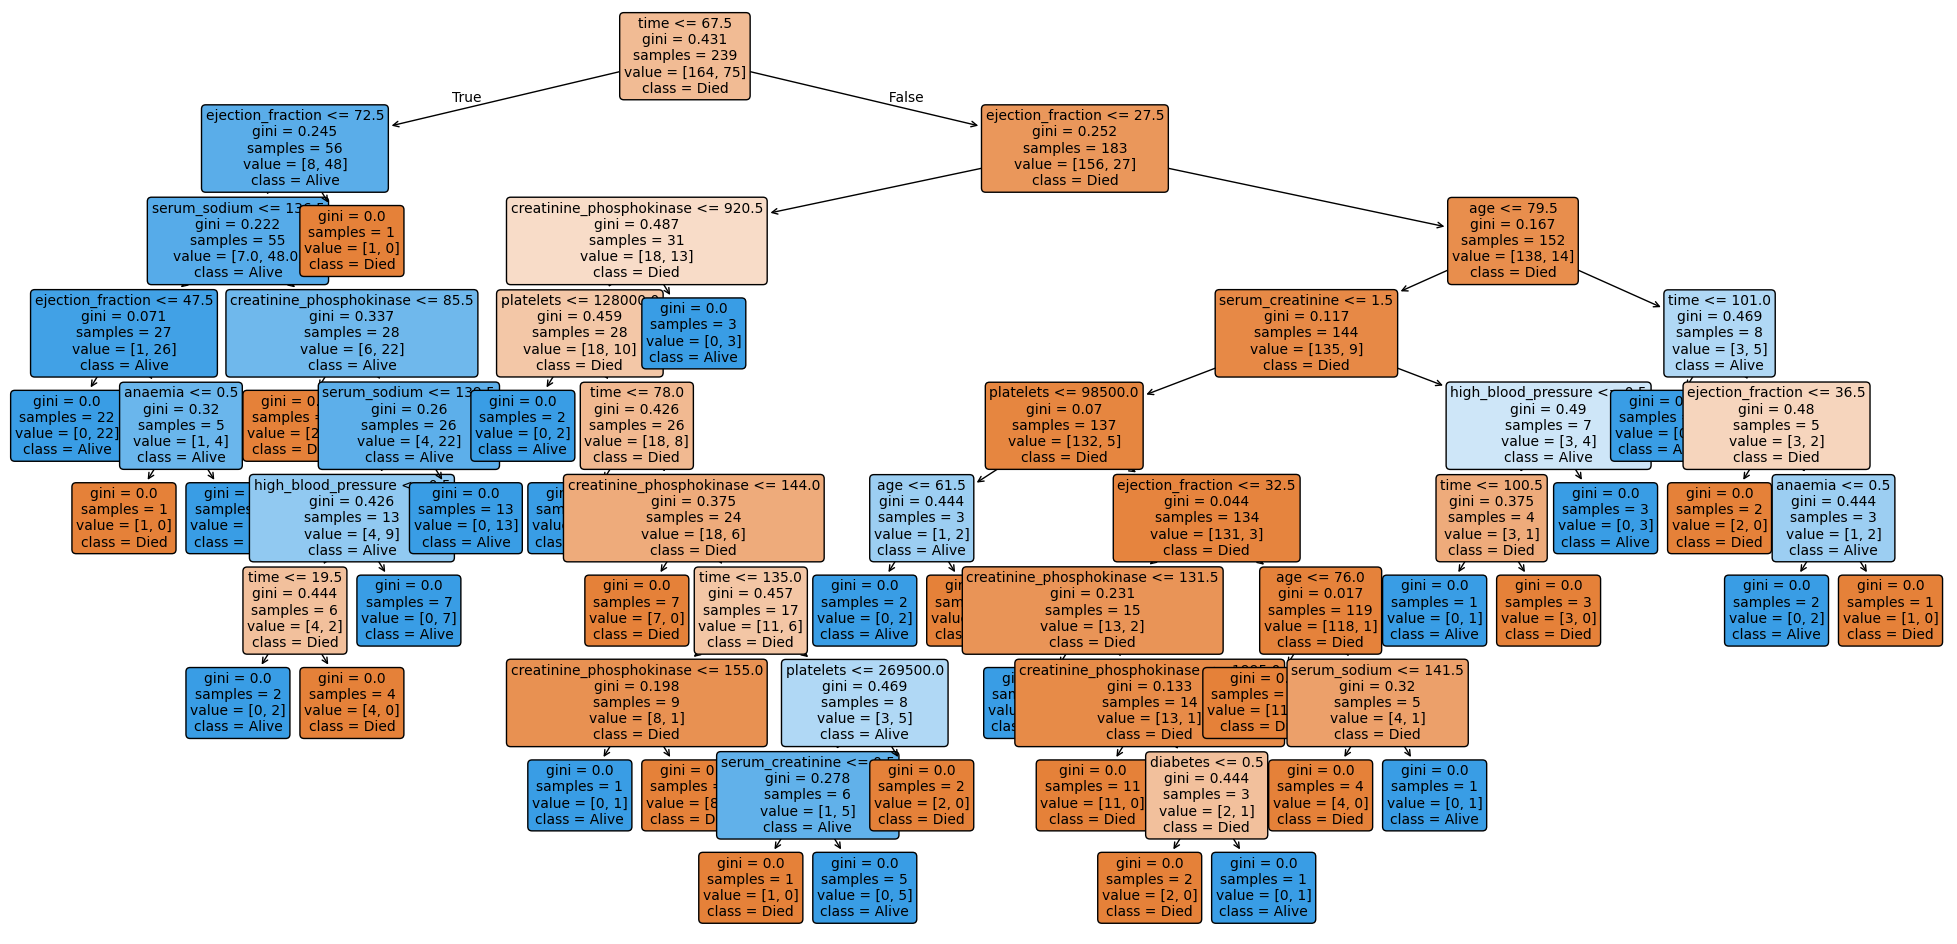

Decision Tree Accuracy: 0.8666666666666667
Logistic Regression Accuracy: 0.85


In [ ]:
# Train/Test Split Seed = 25

X = df_heart_c.drop(columns = 'DEATH_EVENT')
y = df_heart_c['DEATH_EVENT']

SEED2 = 25

X_train_25, X_test_25, y_train_25, y_test_25 = train_test_split(
    X, y, test_size=0.2, random_state=SEED2
)

tree_25 = DecisionTreeClassifier(random_state=SEED2)
tree_25.fit(X_train_25, y_train_25)

y_pred_tree_25 = tree_25.predict(X_test_25)
tree_acc_25 = accuracy_score(y_test_25, y_pred_tree_25)

plt.figure(figsize=(25, 12))
plot_tree(
    tree_25,
    feature_names=X.columns,
    class_names=["Died", "Alive"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

print("Decision Tree Accuracy:", tree_acc_25)

log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train_25, y_train_25)

y_pred_log_25 = log_reg.predict(X_test_25)
log_acc_25 = accuracy_score(y_test_25, y_pred_log_25)

print("Logistic Regression Accuracy:", log_acc_25)


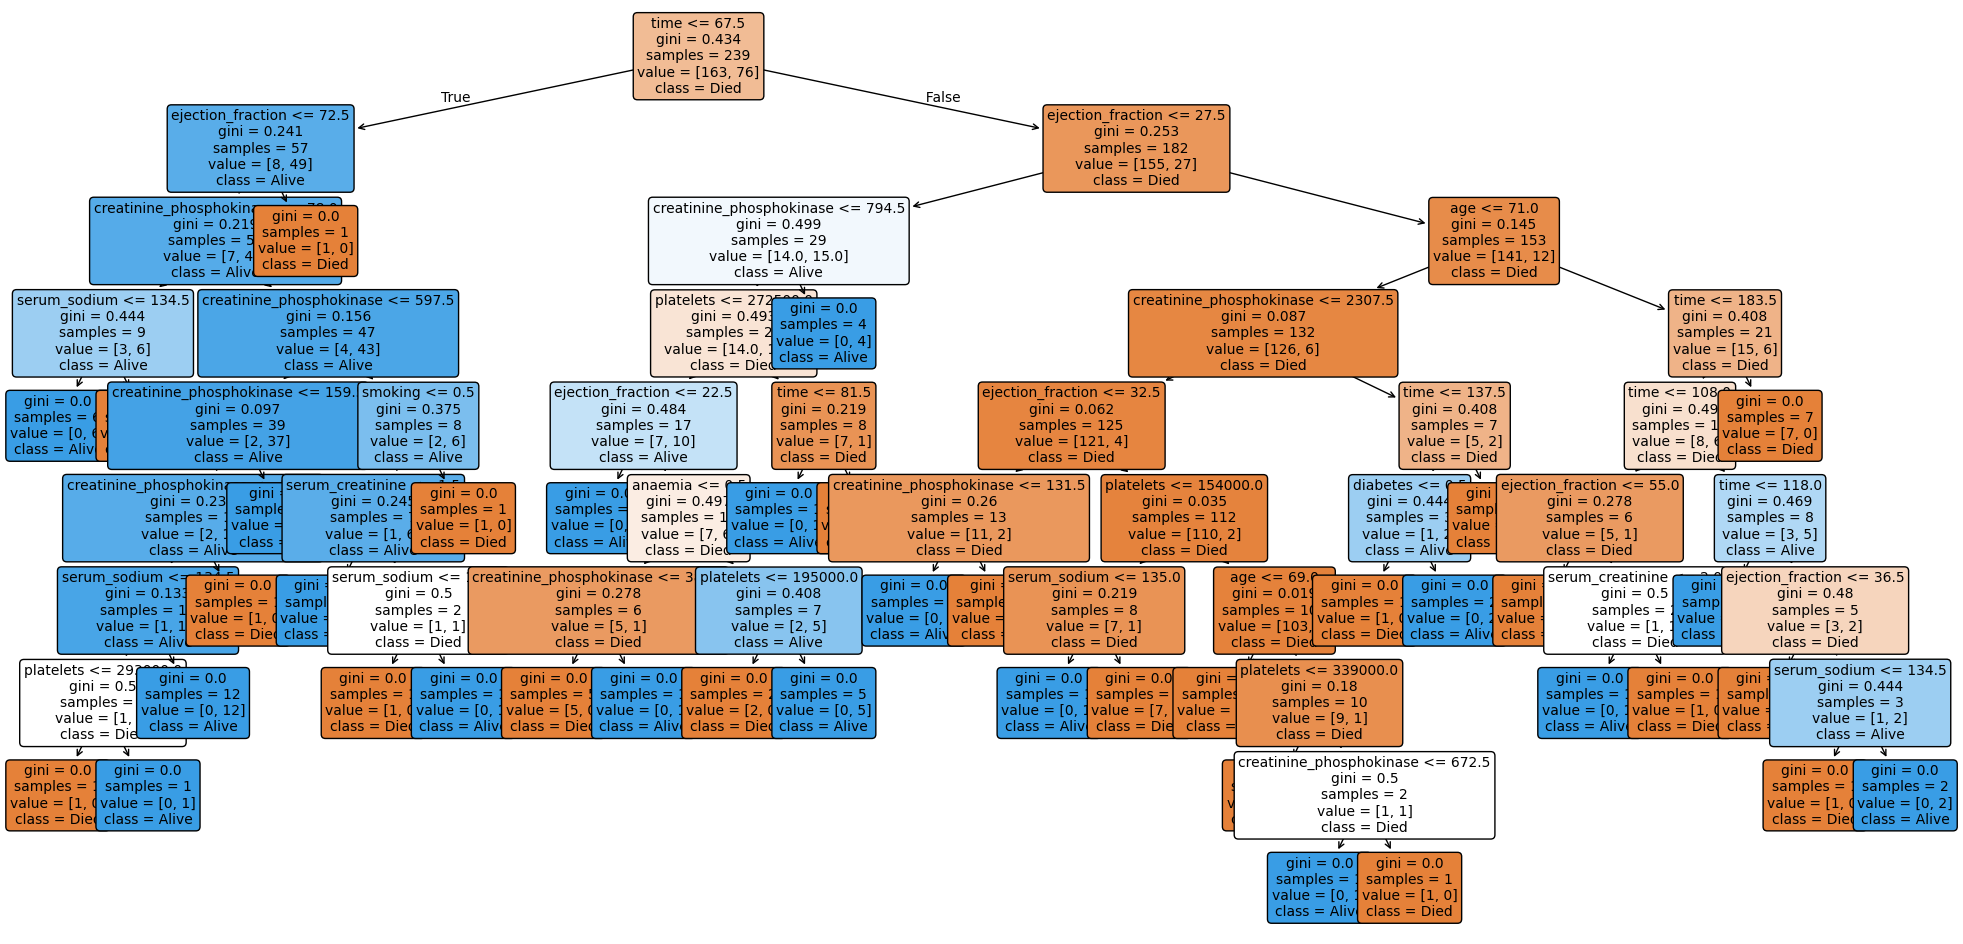

Decision Tree Accuracy: 0.6833333333333333
Logistic Regression Accuracy: 0.8


In [ ]:
#Train/Test Split Seed = 67

X = df_heart_c.drop(columns = 'DEATH_EVENT')
y = df_heart_c['DEATH_EVENT']

SEED3 = 67

X_train_67, X_test_42, y_train_67, y_test_42 = train_test_split(X, y, test_size = 0.2, random_state = SEED3)


tree = DecisionTreeClassifier(random_state = SEED3)
tree.fit(X_train_67, y_train_67)

y_pred_tree_67 = tree.predict(X_test_42)
tree_acc_67 = accuracy_score(y_test_42, y_pred_tree_67)

plt.figure(figsize=(25, 12))
plot_tree(
    tree,
    feature_names=X.columns,
    class_names=["Died", "Alive"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

print("Decision Tree Accuracy:", tree_acc_67)


log_reg = LogisticRegression(max_iter = 5000)
log_reg.fit(X_train_67, y_train_67)

y_pred_log_67 = log_reg.predict(X_test_42)
log_acc_67 = accuracy_score(y_test_42, y_pred_log_67)

print("Logistic Regression Accuracy:", log_acc_67)

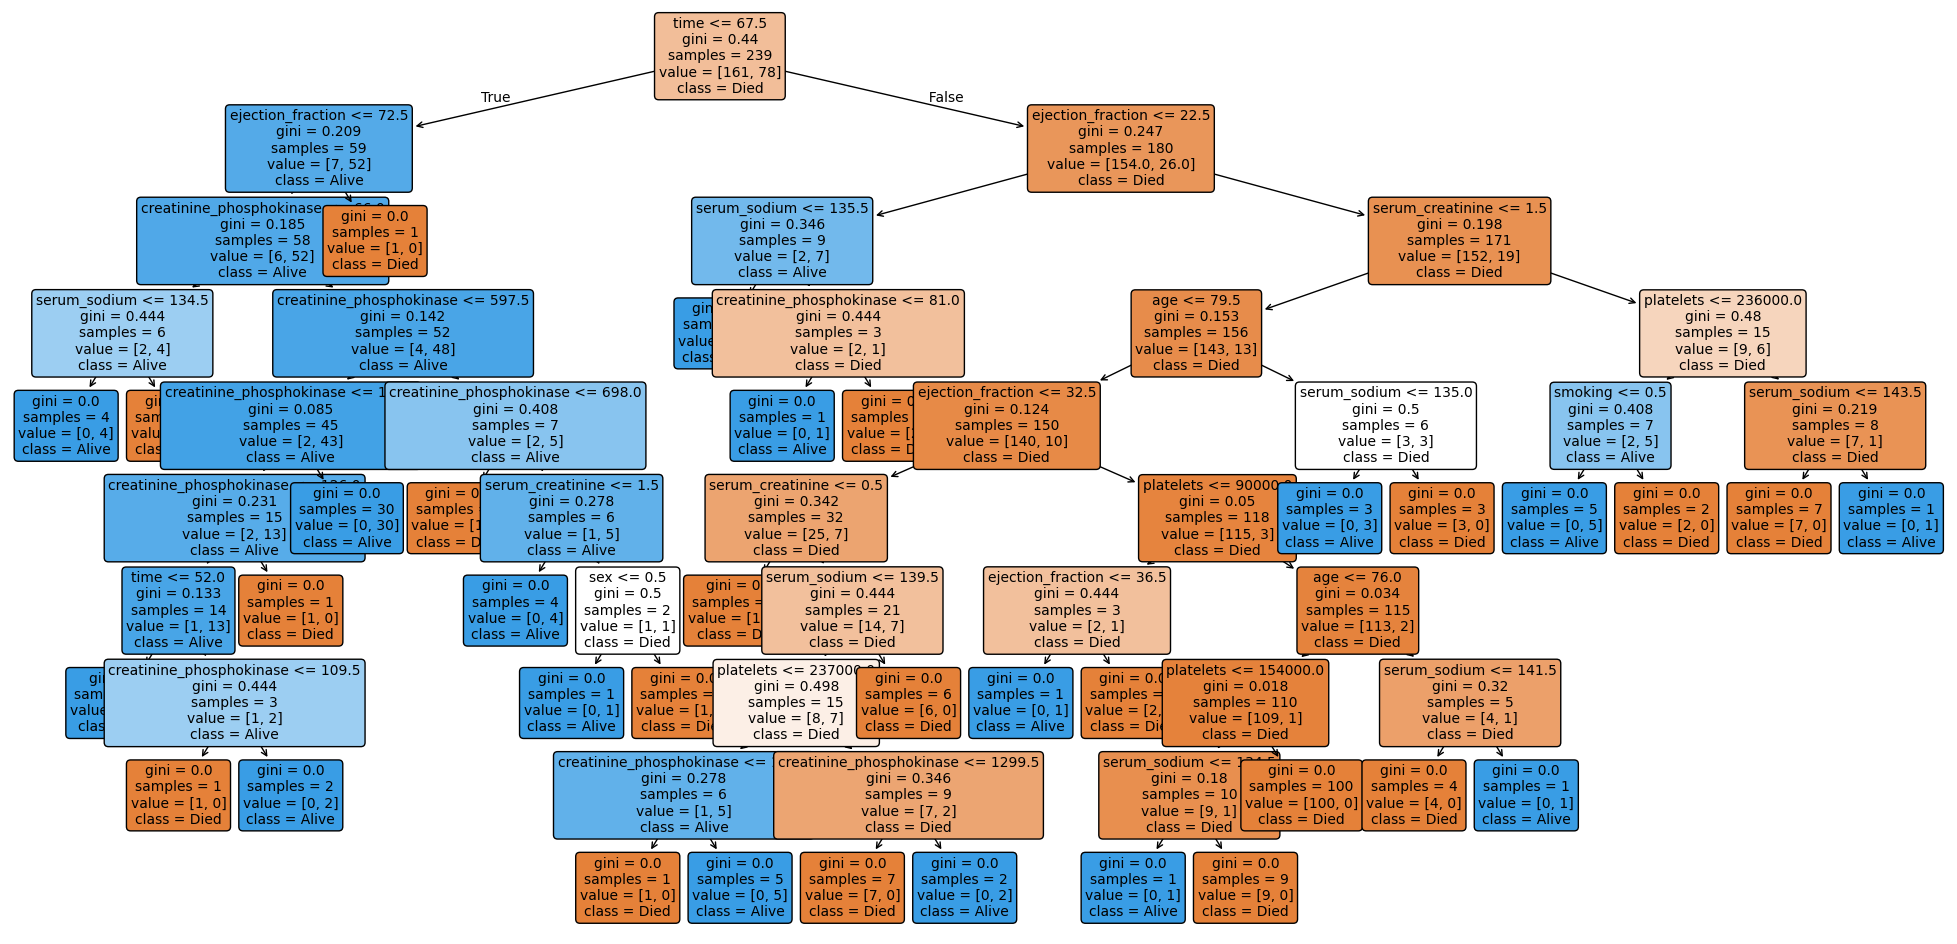

Decision Tree Accuracy: 0.75
Logistic Regression Accuracy: 0.7833333333333333


In [ ]:
#Train/Test Split Seed = 150

X = df_heart_c.drop(columns = 'DEATH_EVENT')
y = df_heart_c['DEATH_EVENT']

SEED4 = 150

X_train_150, X_test_42, y_train_150, y_test_42 = train_test_split(X, y, test_size = 0.2, random_state = SEED4)


tree = DecisionTreeClassifier(random_state = SEED4)
tree.fit(X_train_150, y_train_150)

y_pred_tree_150 = tree.predict(X_test_42)
tree_acc_150 = accuracy_score(y_test_42, y_pred_tree_150)

plt.figure(figsize=(25, 12))
plot_tree(
    tree,
    feature_names=X.columns,
    class_names=["Died", "Alive"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

print("Decision Tree Accuracy:", tree_acc_150)


log_reg = LogisticRegression(max_iter = 5000)
log_reg.fit(X_train_150, y_train_150)

y_pred_log_150 = log_reg.predict(X_test_42)
log_acc_150 = accuracy_score(y_test_42, y_pred_log_150)

print("Logistic Regression Accuracy:", log_acc_150)

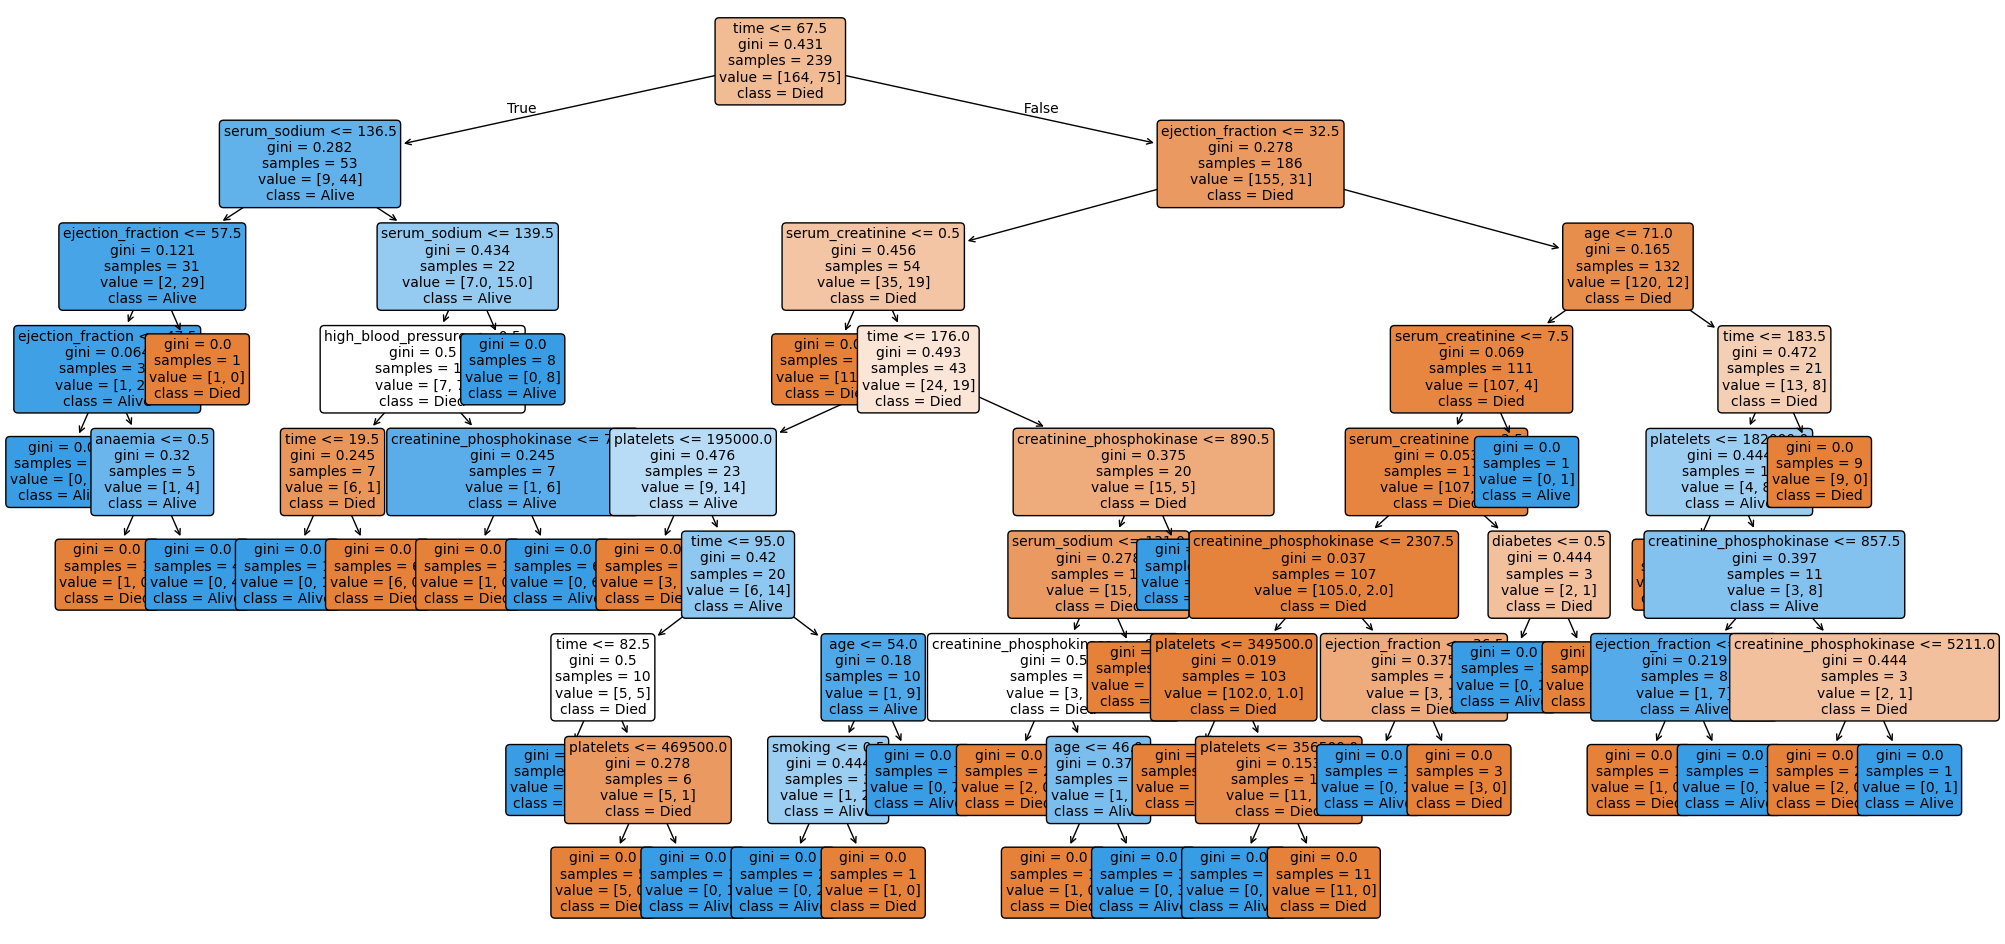

Decision Tree Accuracy: 0.7833333333333333
Logistic Regression Accuracy: 0.85


In [ ]:
#Train/Test Split Seed = 12
X = df_heart_c.drop(columns = 'DEATH_EVENT')
y = df_heart_c['DEATH_EVENT']

SEED5 = 12

X_train_12, X_test_42, y_train_12, y_test_42 = train_test_split(X, y, test_size = 0.2, random_state = SEED5)


tree = DecisionTreeClassifier(random_state = SEED5)
tree.fit(X_train_12, y_train_12)

y_pred_tree_12 = tree.predict(X_test_42)
tree_acc_12 = accuracy_score(y_test_42, y_pred_tree_12)

plt.figure(figsize=(25, 12))
plot_tree(
    tree,
    feature_names=X.columns,
    class_names=["Died", "Alive"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

print("Decision Tree Accuracy:", tree_acc_12)


log_reg = LogisticRegression(max_iter = 5000)
log_reg.fit(X_train_12, y_train_12)

y_pred_log_12 = log_reg.predict(X_test_42)
log_acc_12 = accuracy_score(y_test_42, y_pred_log_12)

print("Logistic Regression Accuracy:", log_acc_12)

**How different are the trees that you get? Your linear model coefficients?**

The five random seeds all seem to have a similar overall structure of the decision trees. The same dominant features consistently appeared near the top fo the trees, which include serum_sodium, ejection_fraction, serum_creatine, and creatine_phosphokinase. Although the order of the splits varied slightly across the different seeds, these features were in top nodes in all 5 decision trees, indicating that they are the most dominant features. However, the trees vary in decision tree accuracy, ranging from about 0.68 to 0.86. This indicates the instability within the trees and that the changes in the train-test split leads to different predictive performances. In contrast, the linear regresssion accuracy of the trees seems more stable, having a range from about 0.71 to 0.85.

**4.1 Make scatterplots of the predicted values on the test set from question 2 against the predicted values for the alternative models from part 3, separately for your trees and linear models. Do they appear reasonably similar?**

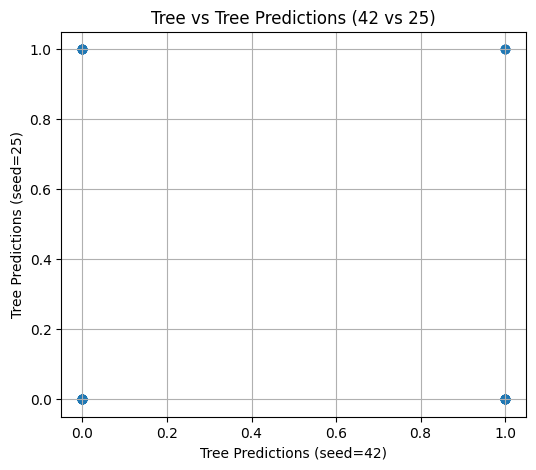

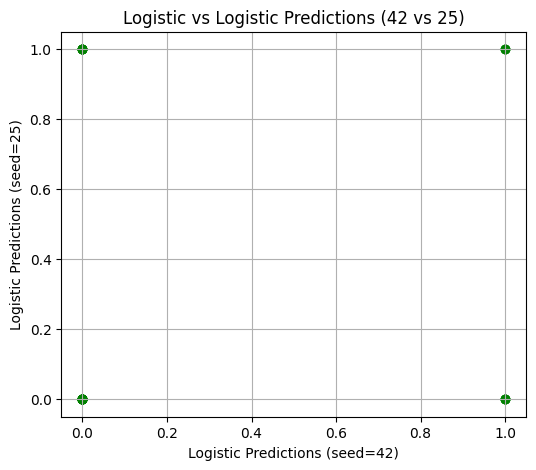

In [ ]:
# 42 vs. 25

plt.figure(figsize=(6,5))
plt.scatter(y_pred_tree_42, y_pred_tree_25, alpha=0.6)
plt.xlabel("Tree Predictions (seed=42)")
plt.ylabel("Tree Predictions (seed=25)")
plt.title("Tree vs Tree Predictions (42 vs 25)")
plt.grid(True)
plt.show()

plt.figure(figsize=(6,5))
plt.scatter(y_pred_log_42, y_pred_log_25, alpha=0.6, color='green')
plt.xlabel("Logistic Predictions (seed=42)")
plt.ylabel("Logistic Predictions (seed=25)")
plt.title("Logistic vs Logistic Predictions (42 vs 25)")
plt.grid(True)
plt.show()

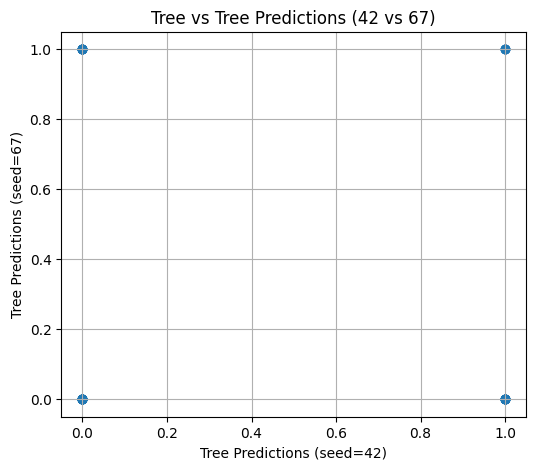

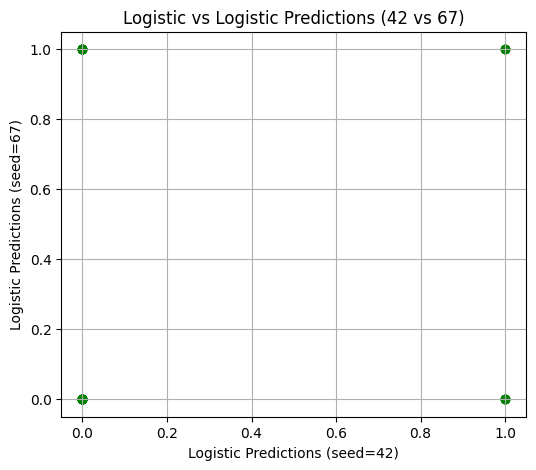

In [ ]:
#42 vs. 67

plt.figure(figsize=(6,5))
plt.scatter(y_pred_tree_42, y_pred_tree_67, alpha=0.6)
plt.xlabel("Tree Predictions (seed=42)")
plt.ylabel("Tree Predictions (seed=67)")
plt.title("Tree vs Tree Predictions (42 vs 67)")
plt.grid(True)
plt.show()

plt.figure(figsize=(6,5))
plt.scatter(y_pred_log_42, y_pred_log_67, alpha=0.6, color='green')
plt.xlabel("Logistic Predictions (seed=42)")
plt.ylabel("Logistic Predictions (seed=67)")
plt.title("Logistic vs Logistic Predictions (42 vs 67)")
plt.grid(True)
plt.show()

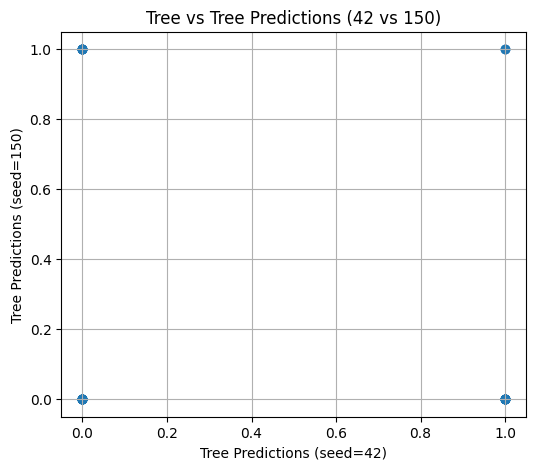

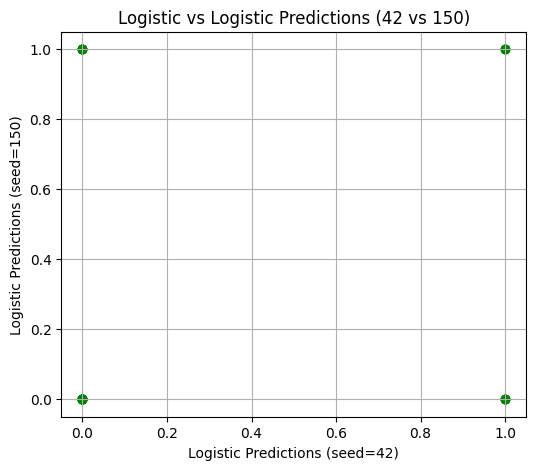

In [ ]:
#42 vs. 150

plt.figure(figsize=(6,5))
plt.scatter(y_pred_tree_42, y_pred_tree_150, alpha=0.6)
plt.xlabel("Tree Predictions (seed=42)")
plt.ylabel("Tree Predictions (seed=150)")
plt.title("Tree vs Tree Predictions (42 vs 150)")
plt.grid(True)
plt.show()

plt.figure(figsize=(6,5))
plt.scatter(y_pred_log_42, y_pred_log_150, alpha=0.6, color='green')
plt.xlabel("Logistic Predictions (seed=42)")
plt.ylabel("Logistic Predictions (seed=150)")
plt.title("Logistic vs Logistic Predictions (42 vs 150)")
plt.grid(True)
plt.show()

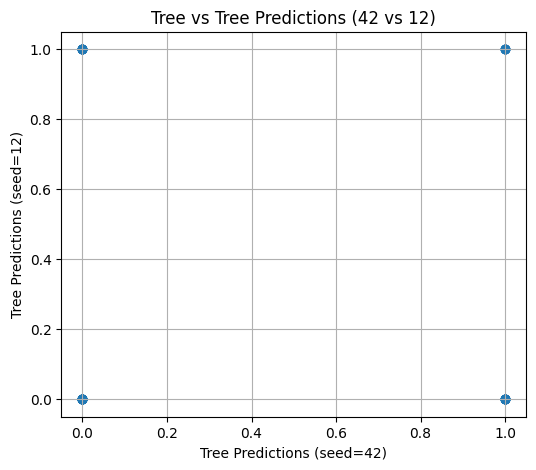

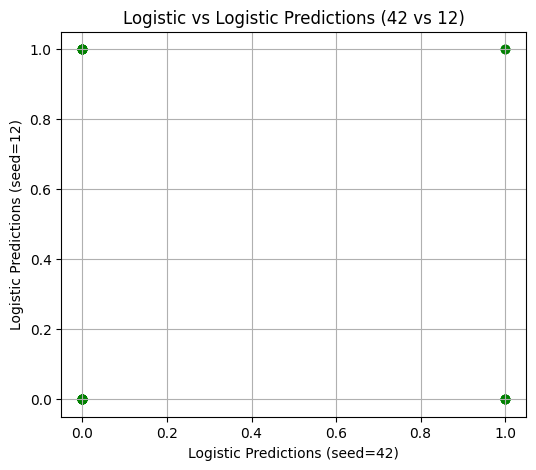

In [ ]:
#42 vs. 12

plt.figure(figsize=(6,5))
plt.scatter(y_pred_tree_42, y_pred_tree_12, alpha=0.6)
plt.xlabel("Tree Predictions (seed=42)")
plt.ylabel("Tree Predictions (seed=12)")
plt.title("Tree vs Tree Predictions (42 vs 12)")
plt.grid(True)
plt.show()

plt.figure(figsize=(6,5))
plt.scatter(y_pred_log_42, y_pred_log_12, alpha=0.6, color='green')
plt.xlabel("Logistic Predictions (seed=42)")
plt.ylabel("Logistic Predictions (seed=12)")
plt.title("Logistic vs Logistic Predictions (42 vs 12)")
plt.grid(True)
plt.show()

 Do the scatterplots appear reasonably similar?:

 Yes, all the scatterplots look nearly identical.

**4.2 Compute the correlation between your model in part 2 and your alternative models in part 3, separately for your trees and linear models. Are they highly correlated or not?**

In [ ]:
#Correlation For Decision Tree Predictions


corr_tree_42_25  = np.corrcoef(y_pred_tree_42, y_pred_tree_25)[0, 1]
corr_tree_42_67  = np.corrcoef(y_pred_tree_42, y_pred_tree_67)[0, 1]
corr_tree_42_150 = np.corrcoef(y_pred_tree_42, y_pred_tree_150)[0, 1]
corr_tree_42_12  = np.corrcoef(y_pred_tree_42, y_pred_tree_12)[0, 1]

print("Tree Correlation (42 vs 25):",  corr_tree_42_25)
print("Tree Correlation (42 vs 67):",  corr_tree_42_67)
print("Tree Correlation (42 vs 150):", corr_tree_42_150)
print("Tree Correlation (42 vs 12):",  corr_tree_42_12)


Tree Correlation (42 vs 25): -0.07187140353206485
Tree Correlation (42 vs 67): -0.05075796486684258
Tree Correlation (42 vs 150): -0.17141269030052114
Tree Correlation (42 vs 12): -0.0047846889952152995


In [ ]:
#Correlation For Logistic Regression Predictions

corr_log_42_25  = np.corrcoef(y_pred_log_42, y_pred_log_25)[0, 1]
corr_log_42_67  = np.corrcoef(y_pred_log_42, y_pred_log_67)[0, 1]
corr_log_42_150 = np.corrcoef(y_pred_log_42, y_pred_log_150)[0, 1]
corr_log_42_12  = np.corrcoef(y_pred_log_42, y_pred_log_12)[0, 1]

print("Logistic Correlation (42 vs 25):",  corr_log_42_25)
print("Logistic Correlation (42 vs 67):",  corr_log_42_67)
print("Logistic Correlation (42 vs 150):", corr_log_42_150)
print("Logistic Correlation (42 vs 12):",  corr_log_42_12)


Logistic Correlation (42 vs 25): 0.16960013132499188
Logistic Correlation (42 vs 67): 0.08838834764831849
Logistic Correlation (42 vs 150): 0.19245008972987535
Logistic Correlation (42 vs 12): 0.03636964837266544


Are they highly correlated or not?

 The decision trees have no correlation, and even present a negative correlation. This indicates that changing the training and testing split with different random seeds changes the predicitions, as there is a great deal of instability. However, the logistic regression models are sligtly correlated, having very low, but positive values. Although they are more stable than the decision tree, they are still not highly correlated across different seeds.

**4.3 Run a simple linear regression of the predicted values on the test set from the alternative models on the predicted values from question 2, separately for your trees and linear models. Is the intercept close to zero? Is the slope close to 1? Is the $R^2$ close to 1?**

In [ ]:
#Decision Trees
from sklearn.linear_model import LinearRegression
import numpy as np

X_base = y_pred_tree_42.reshape(-1, 1)
y_alt = y_pred_tree_25

model_25 = LinearRegression()
model_25.fit(X_base, y_alt)

print("TREE 42 vs 25")
print("Intercept:", model_25.intercept_)
print("Slope:", model_25.coef_[0])
print("R^2:", model_25.score(X_base, y_alt))

X_base = y_pred_tree_42.reshape(-1, 1)
y_alt = y_pred_tree_67

model_67 = LinearRegression()
model_67.fit(X_base, y_alt)

print("TREE 42 vs 67")
print("Intercept:", model_67.intercept_)
print("Slope:", model_67.coef_[0])
print("R^2:", model_67.score(X_base, y_alt))

X_base = y_pred_tree_42.reshape(-1, 1)
y_alt = y_pred_tree_150

model_150 = LinearRegression()
model_150.fit(X_base, y_alt)

print("TREE 42 vs 150")
print("Intercept:", model_150.intercept_)
print("Slope:", model_150.coef_[0])
print("R^2:", model_150.score(X_base, y_alt))

X_base = y_pred_tree_42.reshape(-1, 1)
y_alt = y_pred_tree_12

model_12 = LinearRegression()
model_12.fit(X_base, y_alt)

print("TREE 42 vs 12")
print("Intercept:", model_12.intercept_)
print("Slope:", model_12.coef_[0])
print("R^2:", model_12.score(X_base, y_alt))

TREE 42 vs 25
Intercept: 0.34210526315789475
Slope: -0.06937799043062207
R^2: 0.005165498645668842
TREE 42 vs 67
Intercept: 0.3684210526315789
Slope: -0.05023923444976081
R^2: 0.0025763709974239157
TREE 42 vs 150
Intercept: 0.3421052631578947
Slope: -0.16028708133971287
R^2: 0.029382310396062317
TREE 42 vs 12
Intercept: 0.3684210526315789
Slope: -0.004784688995215282
R^2: 2.2893248780908593e-05


In [ ]:
#Logistic Regression
X_base = y_pred_log_42.reshape(-1, 1)
y_alt = y_pred_log_25

log_25 = LinearRegression()
log_25.fit(X_base, y_alt)

print("LOGISTIC 42 vs 25")
print("Intercept:", log_25.intercept_)
print("Slope:", log_25.coef_[0])
print("R^2:", log_25.score(X_base, y_alt))

X_base = y_pred_log_42.reshape(-1, 1)
y_alt = y_pred_log_67

log_67 = LinearRegression()
log_67.fit(X_base, y_alt)

print("LOGISTIC 42 vs 67")
print("Intercept:", log_67.intercept_)
print("Slope:", log_67.coef_[0])
print("R^2:", log_67.score(X_base, y_alt))

X_base = y_pred_log_42.reshape(-1, 1)
y_alt = y_pred_log_150

log_150 = LinearRegression()
log_150.fit(X_base, y_alt)

print("LOGISTIC 42 vs 150")
print("Intercept:", log_150.intercept_)
print("Slope:", log_150.coef_[0])
print("R^2:", log_150.score(X_base, y_alt))

X_base = y_pred_log_42.reshape(-1, 1)
y_alt = y_pred_log_12

log_12 = LinearRegression()
log_12.fit(X_base, y_alt)

print("LOGISTIC 42 vs 12")
print("Intercept:", log_12.intercept_)
print("Slope:", log_12.coef_[0])
print("R^2:", log_12.score(X_base, y_alt))

LOGISTIC 42 vs 25
Intercept: 0.22916666666666666
Slope: 0.1875
R^2: 0.02876420454545503
LOGISTIC 42 vs 67
Intercept: 0.3125
Slope: 0.1041666666666667
R^2: 0.0078125
LOGISTIC 42 vs 150
Intercept: 0.20833333333333334
Slope: 0.20833333333333331
R^2: 0.03703703703703698
LOGISTIC 42 vs 12
Intercept: 0.2916666666666667
Slope: 0.04166666666666659
R^2: 0.001322751322751392


Is the intercept close to zero? Is the slope close to 1? Is the $R^2$ close to 1?

For the decision trees, the intercepts (0.34–0.37) are not close to zero, and the slopes (–0.07 to –0.005) are very far from 1, even negative in some cases. The R² values are extremely low (0.005–0.029). However for one comparison, it produces an R² greater than 1, showing instability across the random seeds.

The logistic regression models also do not show much stability. The intercepts (0.23–0.31) are fairly far from zero. Furthermore, the slopes (0.04–0.19) are far from 1 and the R² values (0.001–0.03) are also very low.

**5. Do linear models appear to have similar coefficients and predictions across train/test splits? Do trees?**

The linear models appear to have similar coefficients and predictions across train/test splits, demonstrating stability. The coefficients and the predictions do not change significantly across the different random seeds. However, the correlations and R2 values have greater variability, demonstrating that there are still differences between the varying splits. In contrast, decision trees show high instability. Even though the structure appears to be visually similar, the predictions are fairly different across the splits. The correlations are also negative across the different seeds, the slopes are far from 1, intercepts are far from 0, and the R2 values are very low.

**6. True or false, and explain: "Even if the models end up having a substantially different appearance, the predictions they generate are often very similar."**

This statement is false because visual similarity or difference does not ensure that predictions will be similar. This is because decision trees are often instable, and small changes in random seeds or train/test splits can lead to large predictive differences. Although linear models are slighly more stable, they also do not have very similar predictions across different splits and random seeds.